# Example case of making RMS maps. #

If you only want to get an RMS map with _M2_ProposalTools_ , here is an example.

In [1]:
import MakeRMSmap as MRM
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
##########################################################
### Let's jump into what you need to get an RMS map:
### 
### I want the user to define parameters for a map.
### Notably, the astrometry: 
### (1) RA, Dec of the centroid of the map (both in degrees)
### (2) Number of x and y pixels
### (3) And the pixel size (in arcseconds)
########################################################
### The user will also need to decide on the pointings, sizes, and times of scans.
### Scans are assumed to be a Lissajous daisy, LJD
### Scans are assumed to be exactly on the pointings (in RA,Dec) provided unless
### The size is given as a negative. If the scan is given as a negative, this script
### assumes that you want offset pointings (i.e. the 4-offset pattern often adopted).
### The default offset value is 1.5 (arcminutes). You can choose an alternate value if you wish.
########################################################


In [3]:
Center  = [280.0, 45.0]                     # Arbitrary RA and Dec
pixsize = 2.0                               # arcseconds
xsize   = 12.0                              # arcminutes; this is a bit larger than typical
ysize   = 12.0                              # arcminutes
nx      = int(np.round(xsize*60/pixsize))   # Number of pixels (must be an integer!)
ny      = int(np.round(ysize*60/pixsize))   # Number of pixels (must be an integer!)
############################################################################################
Ptgs    = [Center]                          # Pointings should be a list of (RA,Dec) array-like values.
sizes   = [-3.5]                            # Let's try offset scans! Here, 3.5' scans, offset
times   = [10.0]                            # 10 hours
offsets = [1.5]                               # 1.5 arcminute offset (the default, but we may change it)
############################################################################################
### Some additional parameters useful for plotting
Theta500 = 3.5                             # Radius of interest, in arcminutes. If > 0, a circle will be plotted of this radius.
#500 comes from the relevance/interest for galaxy clusters


In [4]:
### We'll take the RA,Dec value to be the *center* of the map.
### If you want to offset this, you can either compute what the center (in pixels) should be
### and pass them in as <cx> and <cy>. Or ...just recompute the center RA and Dec.
TemplateHDU = MRM.make_template_hdul(nx,ny,Center,pixsize)

In [5]:
#RMSmap,nscans = MRM.make_rms_map(TemplateHDU,Ptgs,sizes,times,offset=offset)
RMSmap,nscans = MRM.make_rms_map(TemplateHDU,Ptgs,sizes,times,offsets=offsets)

In [6]:
RMSmap.shape

(360, 360)

In [7]:
np.max(RMSmap)

202.85724943433556

In [8]:
prntinfo = True
############## Some inputs are useful if your template HDU has an actual image you want to portray 
############## with respect to your RMS map. (Do features align with desired map depth?)
ggm      = False   # Perform Gaussian Gradient Magnitude on the image of the Template HDU
ncnts    = 0       # Number of contours. 1-3 is good for highlighting features. Contours are automatically created in logarithmic
                   # spacing between the minimum (acceptable, see below) and maximum ggm values.
ggmCut   = 0.01    # This multiplied by the *maximum* of the GGM map is a threshold. So gradients < 1% are ignored/omitted.
ggmIsImg = False   # If you want to display the ggm image instead of the RMS map, you can set this to True
                   # This is primarily useful to get a handle on the values of the GGM image.(So that you may decide on values above)
###################################################################################################
vmin     = 20.0    # uK. Minimum RMS depth expected
vmax     = 200.0   # uK. Maximum RMS to be colored. 
###################################################################################################
tsource  = np.sum(times)        # Total hours on source.
R500     = Theta500*60/pixsize  # Number of pixels
R5c      = "k"                  # Black color for the circle drawn at R500 pixels
zoom     = 1.0                  # Often the map is bigger than needed; you may want to zoom in by some amount.
noaxes   = True                 # Label the axes? Often not necessary.
myfs     = 20                   # fontsize
###################################################################################################
outpng   = "Example_rmsmap_OffsetPintings_3p5each_wR500.png"

MRM.plot_rms_general(TemplateHDU,outpng,nscans=nscans,prntinfo=prntinfo,cra=Center[0],cdec=Center[1],
                    ggm=ggm,ncnts=ncnts,vmin=vmin,vmax=vmax,ggmCut=ggmCut,ggmIsImg=ggmIsImg,rmsmap=RMSmap,
                    tsource=tsource,R500=R500,r5col=R5c,zoom=zoom,noaxes=noaxes,myfs=myfs)


/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("tab20b").copy()
  mycmap.set_under('w')
/home/charles/Python/ForGitHub/M2_TJ/src/M2_ProposalTools/MakeRMSmap.py:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("tab20b").copy()
  mycmap.set_over('w')


144 0 58 206 360.0 20
I already did this


<Figure size 504x360 with 0 Axes>

In [9]:
MRM=reload(MRM)

In [10]:
RMSrads,RMSprof = MRM.calc_RMS_profile(TemplateHDU,RMSmap,Center)
MapSpdProf      = RMSprof * np.sqrt(np.sum(times)) 
LJD_MapSpeed    = MRM.get_rmsprof_from_s(RMSrads,-sizes[0])

In [11]:
Rmaxes          = [2,3,4]                        # Rmaxes of 2', 3', and 4'
AvgedMapSpds    = MRM.calculate_RMS_within(RMSrads,MapSpdProf,Rmaxes=Rmaxes)  
LJD_AvgMpSpds   = MRM.calculate_RMS_within(RMSrads,LJD_MapSpeed,Rmaxes=Rmaxes)

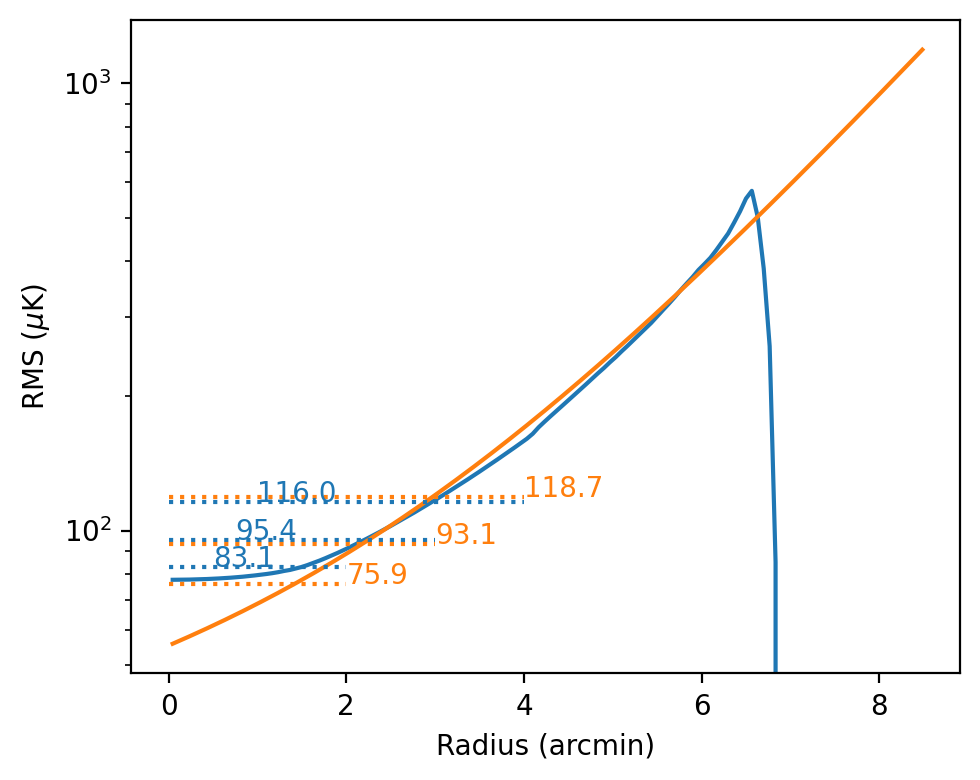

In [12]:
RMSfig = plt.figure(1,figsize=(5,4),dpi=200)
RMSfig.clf()
RMSax  = RMSfig.add_subplot(111)
RMSax.plot(RMSrads,MapSpdProf,label="3.5; Offset by 1.5")
RMSax.plot(RMSrads,LJD_MapSpeed,label="3.5; single ptg")
for Rmax,AMS,LMS in zip(Rmaxes,AvgedMapSpds,LJD_AvgMpSpds):
    RMSax.plot([0,Rmax],[AMS,AMS],ls=":",color="C0")
    RMSax.text(Rmax/4,AMS,"{:.1f}".format(AMS),color="C0")
    RMSax.plot([0,Rmax],[LMS,LMS],ls=":",color="C1")
    RMSax.text(Rmax,LMS,"{:.1f}".format(LMS),color="C1")
RMSax.set_xlabel("Radius (arcmin)")
RMSax.set_ylabel(r"RMS ($\mu$K)")
RMSax.set_yscale("log")
RMSfig.tight_layout()
RMSfig.savefig("Offset_vs_Single_Pointing_MappingSpeeds_v2.png")